In [1]:
import pandas as pd

# Load the Excel file into a DataFrame
file_path = r"C:\Users\Dell\Downloads\Association Rules\Association Rules\Online retail.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to understand its structure
print(df.head())


  shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0                             burgers,meatballs,eggs                                                                                                                                                                             
1                                            chutney                                                                                                                                                                             
2                                     turkey,avocado                                                                                                                                                                             
3  mineral water,milk,energy bar,whole wheat rice...                                            

In [2]:
# Convert the list of transactions into a list of lists
transactions = [
    ['burgers', 'meatballs', 'eggs'],
    ['chutney'],
    ['turkey', 'avocado'],
    ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
    ['low fat yogurt']
]

# Convert the list of transactions into a DataFrame with one-hot encoding
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the preprocessed DataFrame
print(df.head())


   avocado  burgers  chutney   eggs  energy bar  green tea  low fat yogurt  \
0    False     True    False   True       False      False           False   
1    False    False     True  False       False      False           False   
2     True    False    False  False       False      False           False   
3    False    False    False  False        True       True           False   
4    False    False    False  False       False      False            True   

   meatballs   milk  mineral water  turkey  whole wheat rice  
0       True  False          False   False             False  
1      False  False          False   False             False  
2      False  False          False    True             False  
3      False   True           True   False              True  
4      False  False          False   False             False  


In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Find frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the generated rules
print(rules)


            antecedents                                        consequents  \
0              (turkey)                                          (avocado)   
1             (avocado)                                           (turkey)   
2                (eggs)                                          (burgers)   
3             (burgers)                                             (eggs)   
4           (meatballs)                                          (burgers)   
..                  ...                                                ...   
189              (milk)  (mineral water, whole wheat rice, energy bar, ...   
190  (whole wheat rice)       (milk, mineral water, energy bar, green tea)   
191        (energy bar)  (milk, mineral water, whole wheat rice, green ...   
192         (green tea)  (milk, whole wheat rice, energy bar, mineral w...   
193     (mineral water)    (milk, whole wheat rice, energy bar, green tea)   

     antecedent support  consequent support  support  confidenc

In [4]:
# Sort the rules based on lift values
sorted_rules_lift = rules.sort_values(by='lift', ascending=False)

# Sort the rules based on confidence values
sorted_rules_confidence = rules.sort_values(by='confidence', ascending=False)

# Sort the rules based on support values
sorted_rules_support = rules.sort_values(by='support', ascending=False)

# Display the top rules for each sorted list
print("Top 5 rules sorted by lift:")
print(sorted_rules_lift.head())

print("\nTop 5 rules sorted by confidence:")
print(sorted_rules_confidence.head())

print("\nTop 5 rules sorted by support:")
print(sorted_rules_support.head())


Top 5 rules sorted by lift:
                                      antecedents         consequents  \
0                                        (turkey)           (avocado)   
145             (mineral water, whole wheat rice)  (milk, energy bar)   
123        (energy bar, green tea, mineral water)  (whole wheat rice)   
124     (energy bar, whole wheat rice, green tea)     (mineral water)   
125  (mineral water, whole wheat rice, green tea)        (energy bar)   

     antecedent support  consequent support  support  confidence  lift  \
0                   0.2                 0.2      0.2         1.0   5.0   
145                 0.2                 0.2      0.2         1.0   5.0   
123                 0.2                 0.2      0.2         1.0   5.0   
124                 0.2                 0.2      0.2         1.0   5.0   
125                 0.2                 0.2      0.2         1.0   5.0   

     leverage  conviction  zhangs_metric  
0        0.16         inf            1.0  
14

In [5]:
# 1. Identify commonly co-purchased items
commonly_purchased_items = rules.sort_values(by='support', ascending=False).head()
print("Commonly Co-Purchased Items:")
print(commonly_purchased_items)

# 2. Explore how certain items influence the purchase of others
complementary_substitutes = rules.sort_values(by='lift', ascending=False).head()
print("\nItems Influencing Each Other (Complementary or Substitutes):")
print(complementary_substitutes)

# 3. Determine seasonal trends or patterns
# Since the provided data may not contain explicit seasonal information, you may need additional data or domain knowledge to identify seasonal trends.


Commonly Co-Purchased Items:
                                      antecedents         consequents  \
0                                        (turkey)           (avocado)   
145             (mineral water, whole wheat rice)  (milk, energy bar)   
123        (energy bar, green tea, mineral water)  (whole wheat rice)   
124     (energy bar, whole wheat rice, green tea)     (mineral water)   
125  (mineral water, whole wheat rice, green tea)        (energy bar)   

     antecedent support  consequent support  support  confidence  lift  \
0                   0.2                 0.2      0.2         1.0   5.0   
145                 0.2                 0.2      0.2         1.0   5.0   
123                 0.2                 0.2      0.2         1.0   5.0   
124                 0.2                 0.2      0.2         1.0   5.0   
125                 0.2                 0.2      0.2         1.0   5.0   

     leverage  conviction  zhangs_metric  
0        0.16         inf            1.0  
1

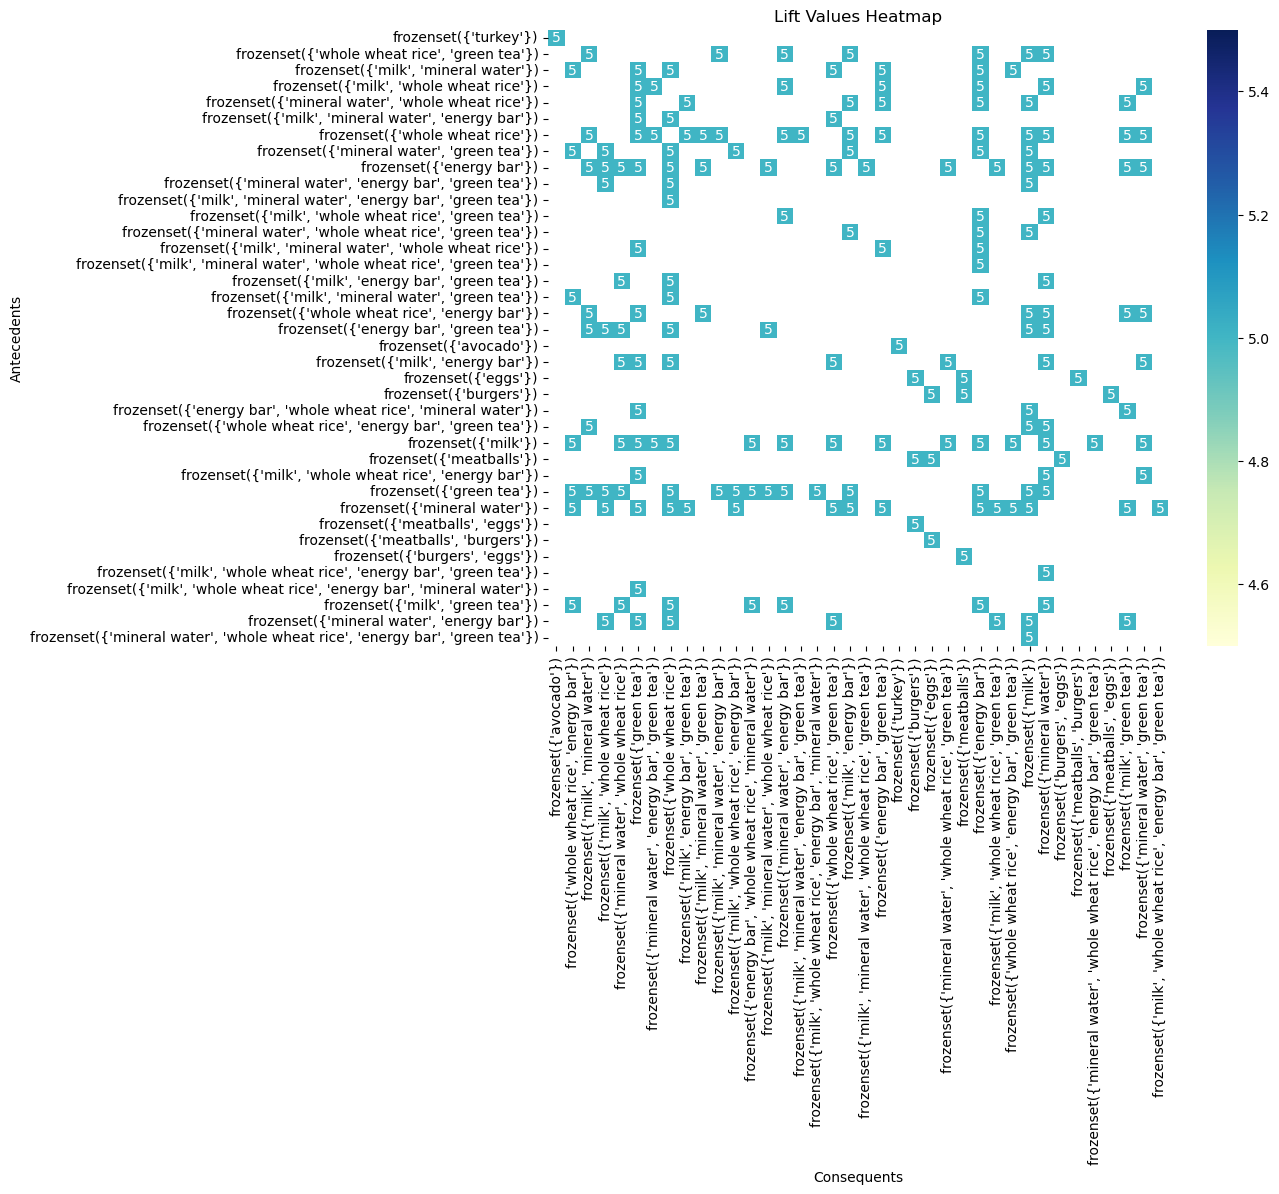

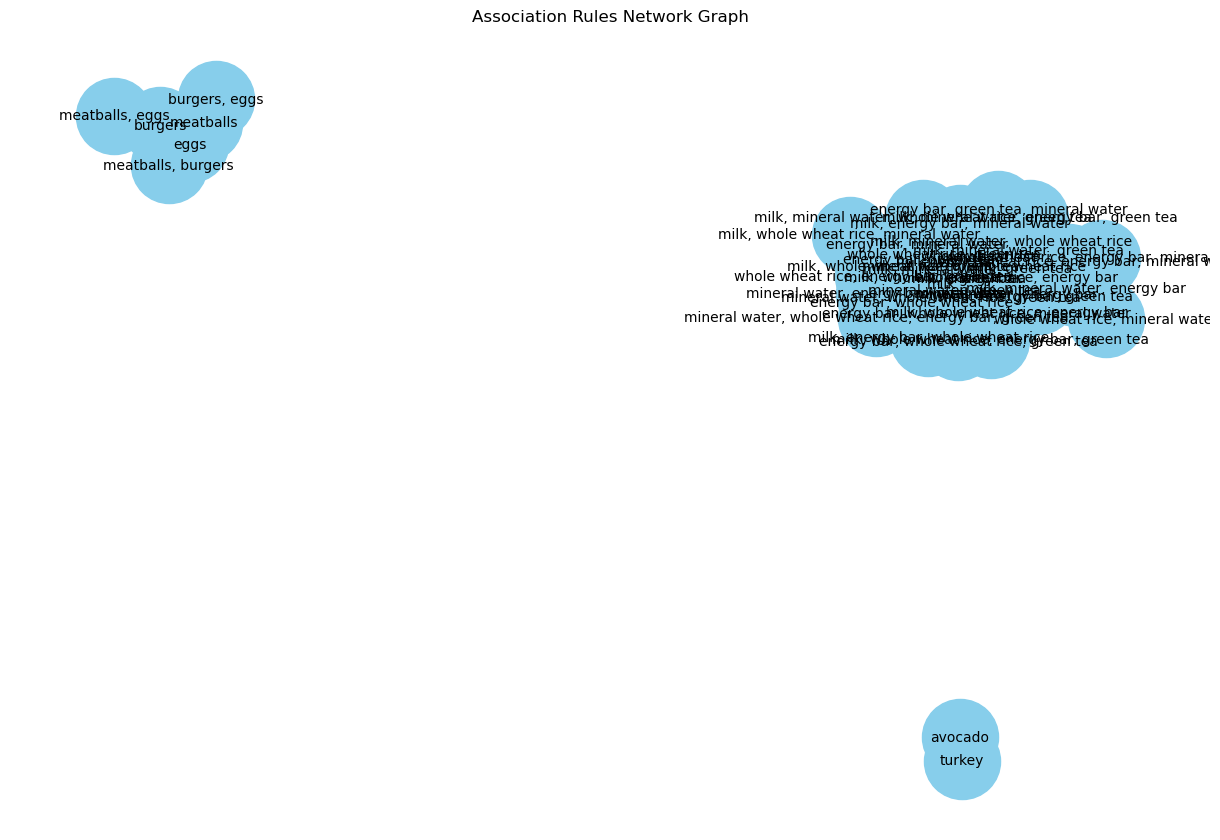

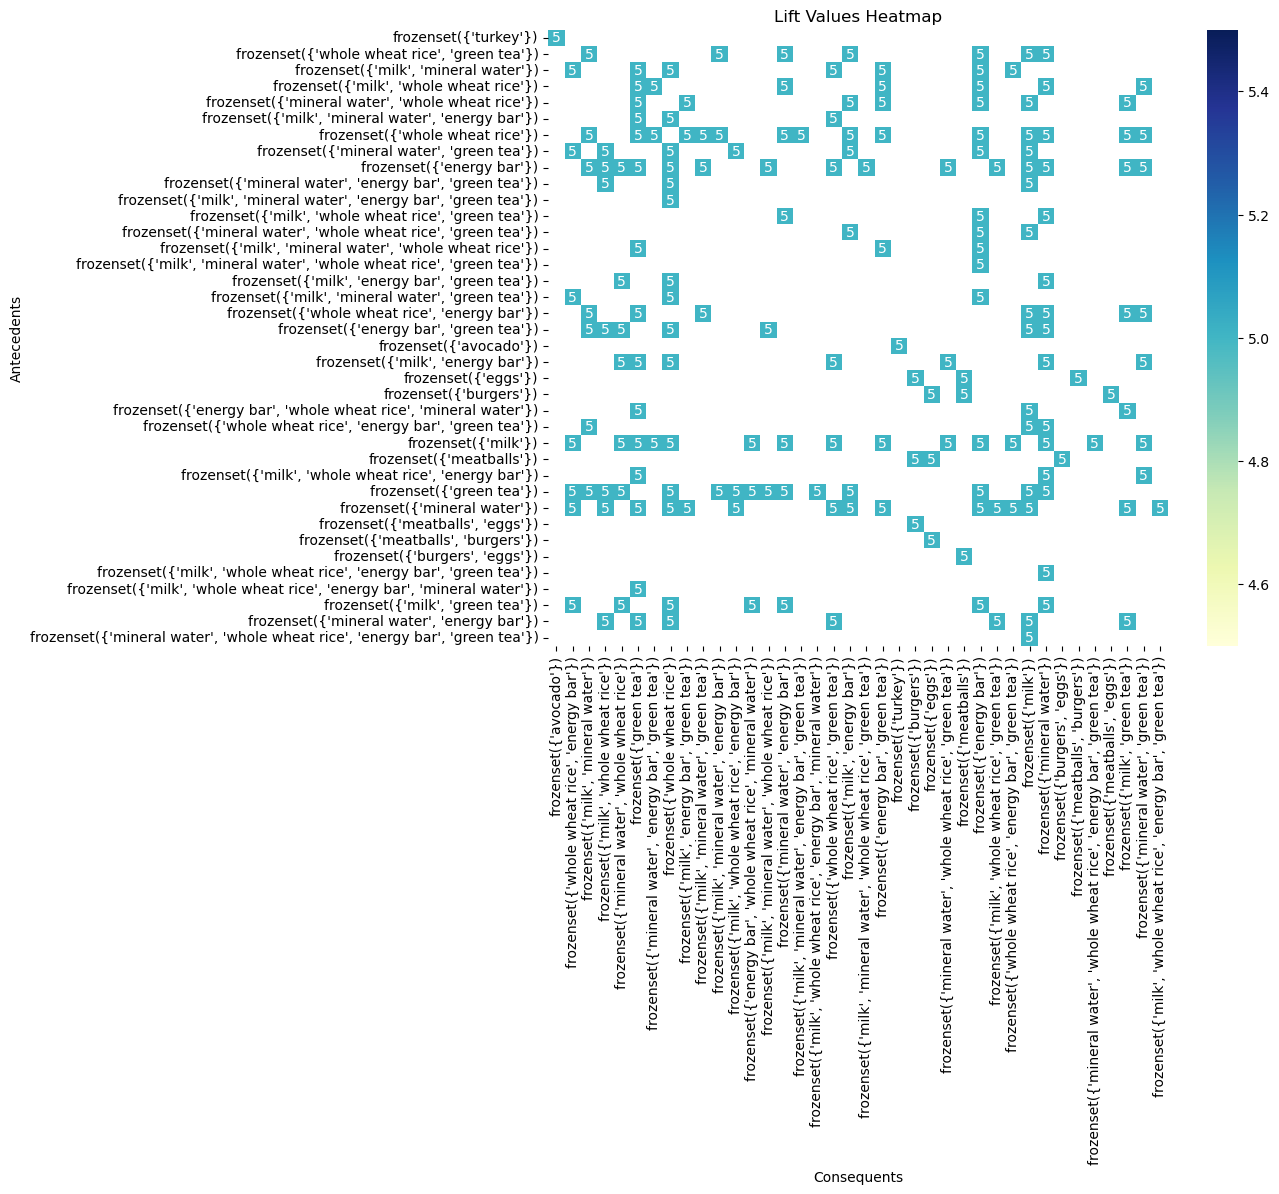

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns  # Add this import statement

# Create a heatmap for lift values
lift_matrix = pd.pivot_table(rules, index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(10, 8))
sns.heatmap(lift_matrix, annot=True, cmap="YlGnBu")
plt.title("Lift Values Heatmap")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()


# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the association rules
for idx, row in rules.iterrows():
    antecedents = ', '.join(row['antecedents'])
    consequents = ', '.join(row['consequents'])
    G.add_edge(antecedents, consequents, weight=row['lift'])

# Plot the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, edge_color='grey', linewidths=1, arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Association Rules Network Graph")
plt.show()

# Create a heatmap for lift values
lift_matrix = pd.pivot_table(rules, index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(10, 8))
sns.heatmap(lift_matrix, annot=True, cmap="YlGnBu")
plt.title("Lift Values Heatmap")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()


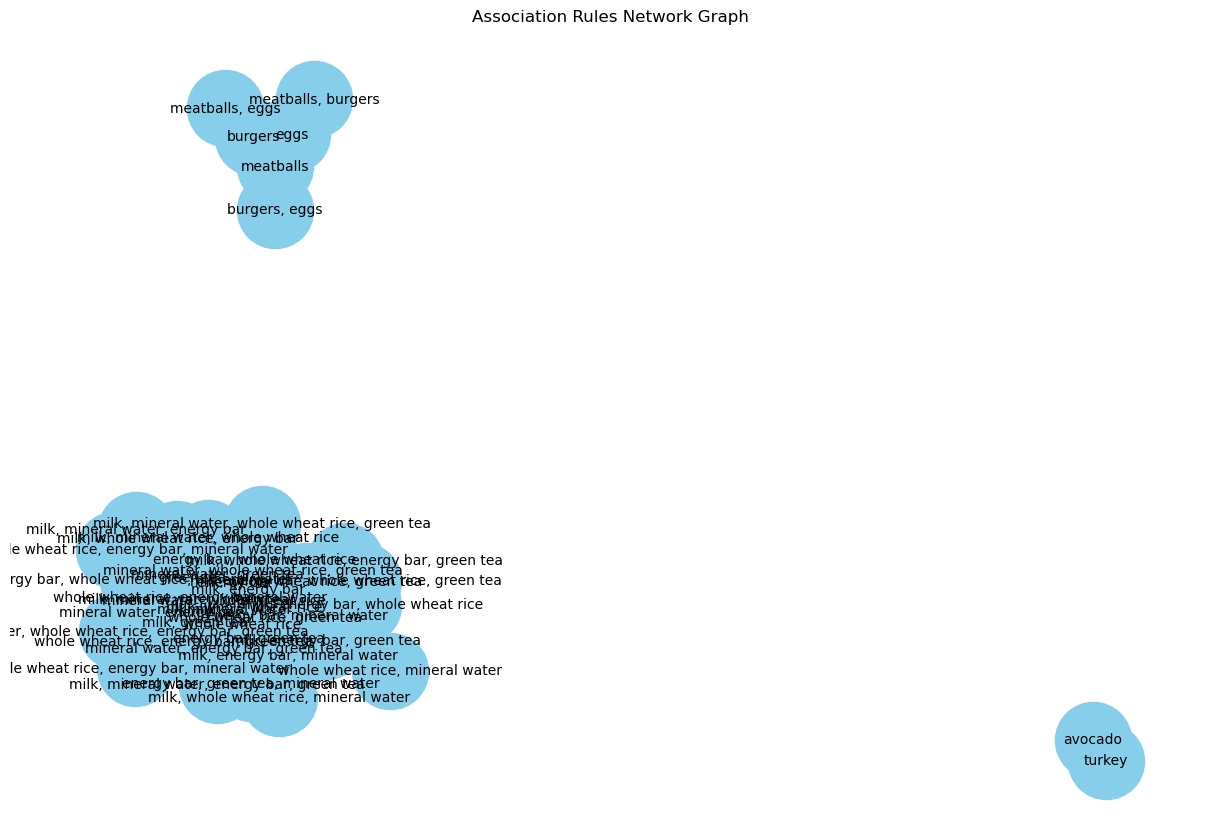

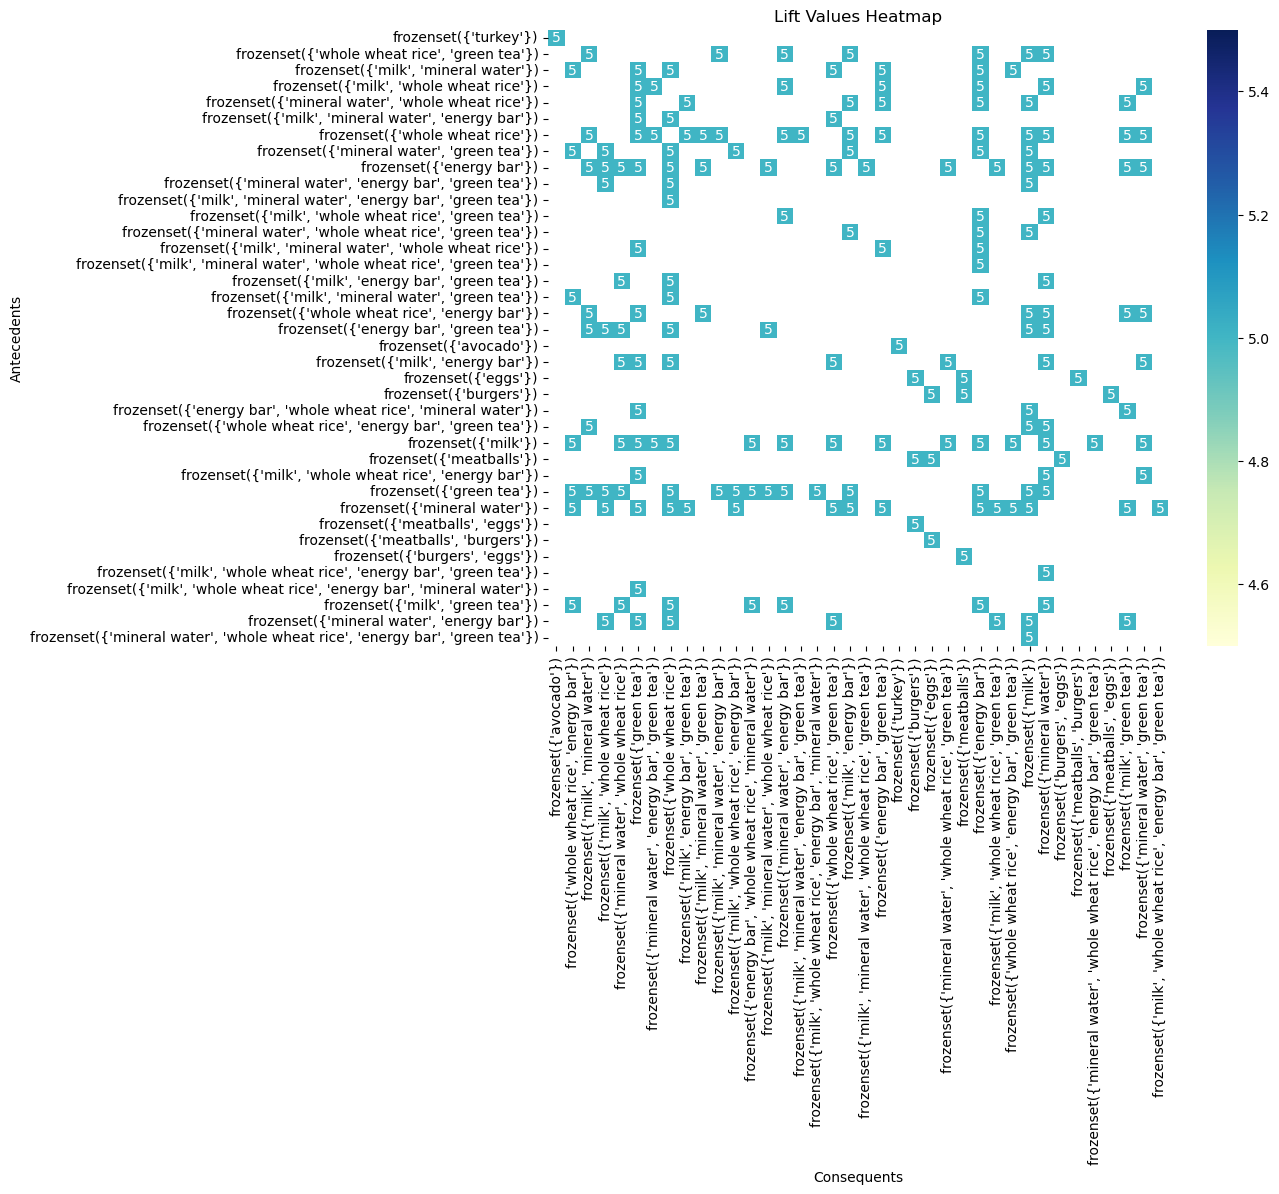

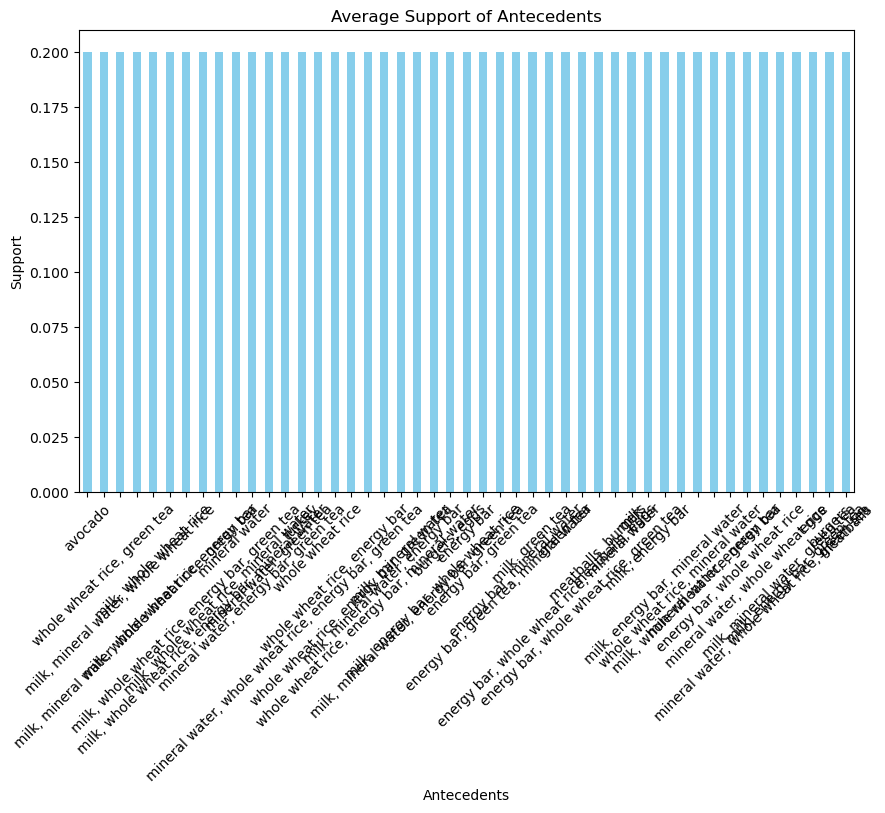

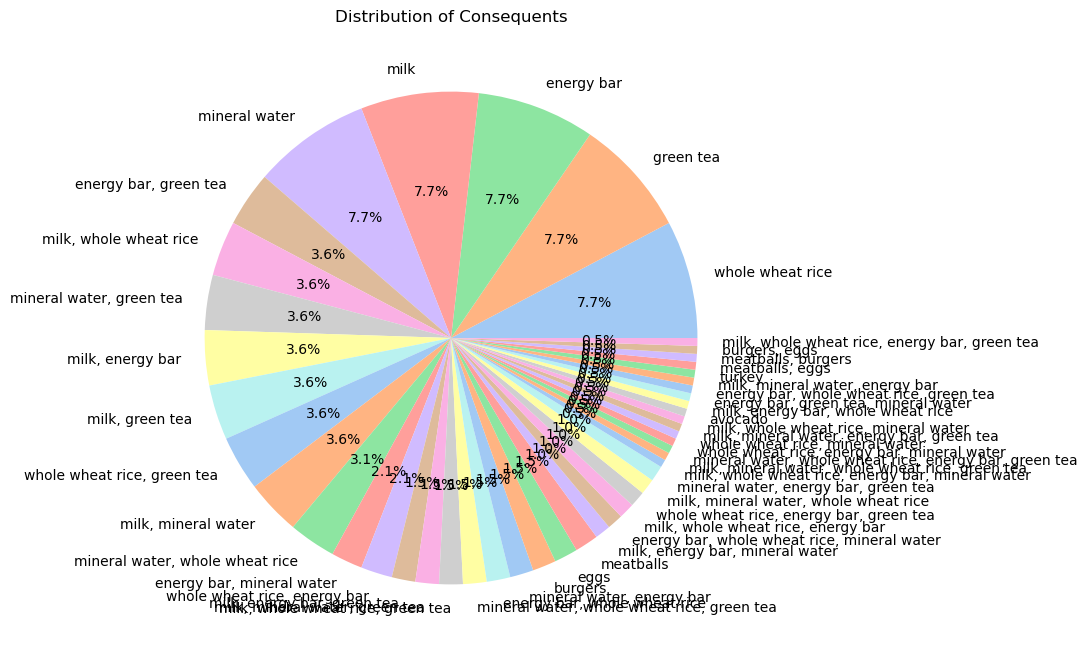

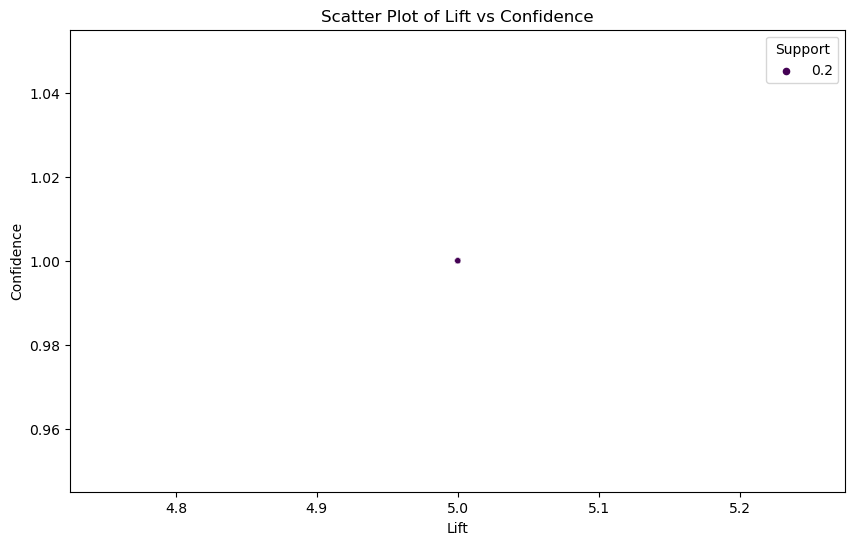

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Assuming 'rules' is your dataframe containing association rules

# 1. Network Graph
G = nx.DiGraph()
for idx, row in rules.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['lift'])
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, edge_color='grey', linewidths=1, arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Association Rules Network Graph")
plt.show()

# 2. Heatmap
lift_matrix = pd.pivot_table(rules, index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(10, 8))
sns.heatmap(lift_matrix, annot=True, cmap="YlGnBu")
plt.title("Lift Values Heatmap")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()

# 3. Bar Chart
plt.figure(figsize=(10, 6))
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(x))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(x))
support_barplot = rules.groupby('antecedents_str')['support'].mean().sort_values().plot(kind='bar', color='skyblue')
support_barplot.set_xlabel('Antecedents')
support_barplot.set_ylabel('Support')
support_barplot.set_title('Average Support of Antecedents')
plt.xticks(rotation=45)
plt.show()

# 4. Pie Chart
plt.figure(figsize=(8, 8))
rules['consequents_str'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Consequents')
plt.ylabel('')
plt.show()

# 5. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lift', y='confidence', data=rules, hue='support', palette='viridis', size='support', sizes=(20, 200))
plt.title('Scatter Plot of Lift vs Confidence')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.legend(title='Support')
plt.show()

# Add more visualizations based on the remaining types mentioned above


Targeted Marketing Campaigns: Use data from association rules to identify popular item combinations and create targeted marketing campaigns or promotions. This can involve creating special offers, discounts, or product bundles for items frequently purchased together.

Optimize Product Placement: Analyze association rules to determine which items are commonly purchased together and optimize product placement in stores or online platforms accordingly. This might involve placing complementary items next to each other to encourage cross-selling.

Personalized Recommendations: Implement recommendation systems based on association rules and customer purchase history. Use machine learning algorithms to analyze customer behavior and provide personalized product recommendations or offers on websites, emails, or mobile apps.

Seasonal Promotions: Use association rules to identify seasonal trends in customer purchasing behavior. Create seasonal promotions or themed product bundles based on these trends to capitalize on customer demand during specific times of the year.

Customer Segmentation: Segment customers based on their purchasing behavior and preferences derived from association rules. Tailor marketing strategies and product offerings to different customer segments to improve relevance and effectiveness.

What is lift and why is it important in Association rules?

Lift measures the strength of association between two items in a rule compared to the items occurring independently. It is calculated as the ratio of the observed support of the items occurring together to the expected support if they were independent.
Lift values greater than 1 indicate that the items are positively correlated, meaning that their co-occurrence is more frequent than random chance. Lift values less than 1 indicate negative correlation, while a lift of 1 implies independence.
Lift is important in association rules because it helps identify meaningful associations between items that are not due to random chance. It allows businesses to focus on item pairs that have a significant impact on each other's purchase decisions, enabling targeted marketing strategies and improved product recommendations.


What is support and confidence. How do you calculate them?

Support: Support measures the frequency of occurrence of an itemset in the dataset. It indicates how frequently a particular combination of items is purchased together.
Support is calculated as the number of transactions containing the itemset divided by the total number of transactions in the dataset.
Confidence: Confidence measures the reliability of the association rule. It indicates the likelihood that the consequent will be purchased given that the antecedent is purchased.
Confidence is calculated as the support of the itemset containing both antecedent and consequent divided by the support of the antecedent.

What are some limitations or challenges of Association rules mining?

Curse of dimensionality: As the number of items in the dataset increases, the number of possible itemsets grows exponentially, leading to computational challenges.
Sparse data: Association rule mining may not be effective for datasets with low support or sparse transactions, where many itemsets occur infrequently.
Quality of rules: Not all discovered rules may be useful or actionable. Some rules may have high support but low confidence, making them less reliable for decision-making.
Scalability: Processing large datasets with millions of transactions or items can be computationally intensive and time-consuming.
Interpretability: Interpreting and understanding the meaning behind discovered rules can be challenging, especially for complex or high-dimensional datasets.
Handling continuous variables: Association rule mining is typically applied to categorical data, and handling continuous variables requires discretization techniques, which may lead to loss of information.